# IPL Data Analytics

In [49]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

d1=pd.read_csv('data/deliveries.csv')
dev=d1.copy()
dev.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [51]:
d2=pd.read_csv('data/IPL_Matches_2022.csv')
matches=d2.copy()
matches.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [25]:
dev.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

# Top Batsmen by Runs

batter
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
Name: batsman_runs, dtype: int64


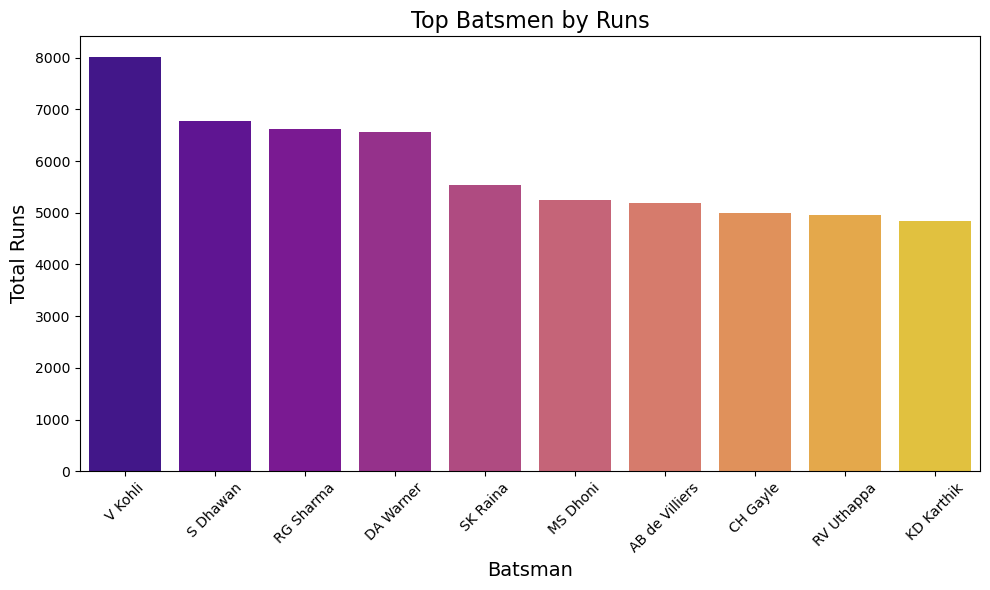

In [26]:
top_batsmen = dev.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)
print(top_batsmen)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_batsmen.index, y=top_batsmen.values, palette=sns.color_palette('plasma', n_colors=len(top_batsmen)),hue=top_batsmen.index)

plt.title('Top Batsmen by Runs', fontsize=16)
plt.xlabel('Batsman', fontsize=14)
plt.ylabel('Total Runs', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top Bowlers by Wickets

bowler
YS Chahal     205
PP Chawla     192
DJ Bravo      183
B Kumar       181
SP Narine     180
R Ashwin      180
A Mishra      174
SL Malinga    170
JJ Bumrah     168
RA Jadeja     160
Name: count, dtype: int64


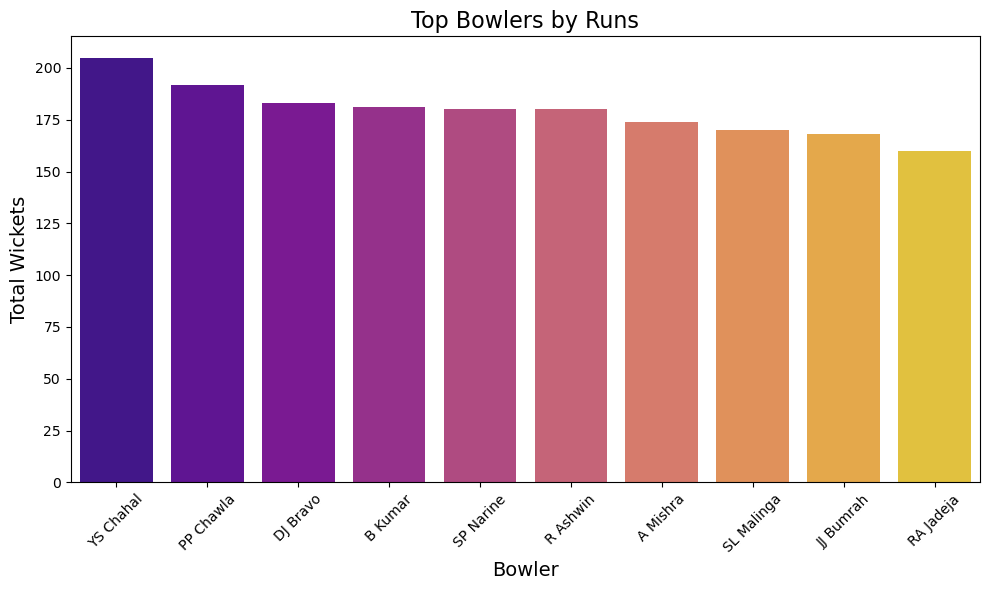

In [27]:
wicket_deliveries = dev[dev['is_wicket'] == 1]
wicket_deliveries = wicket_deliveries[~wicket_deliveries['dismissal_kind'].isin(['run out', 'retired hurt'])]
top_bowlers = wicket_deliveries['bowler'].value_counts().head(10)
print(top_bowlers)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_bowlers.index, y=top_bowlers.values, palette=sns.color_palette('plasma', n_colors=len(top_bowlers)),hue=top_bowlers.index)

plt.title('Top Bowlers by Runs', fontsize=16)
plt.xlabel('Bowler', fontsize=14)
plt.ylabel('Total Wickets', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

    over  total_runs
0      0       13651
1      1       16163
2      2       17895
3      3       18415
4      4       18565
5      5       18528
6      6       14839
7      7       15981
8      8       16639
9      9       16353
10    10       16779
11    11       17076
12    12       17205
13    13       17634
14    14       18149
15    15       18472
16    16       19012
17    17       19559
18    18       19076
19    19       17765


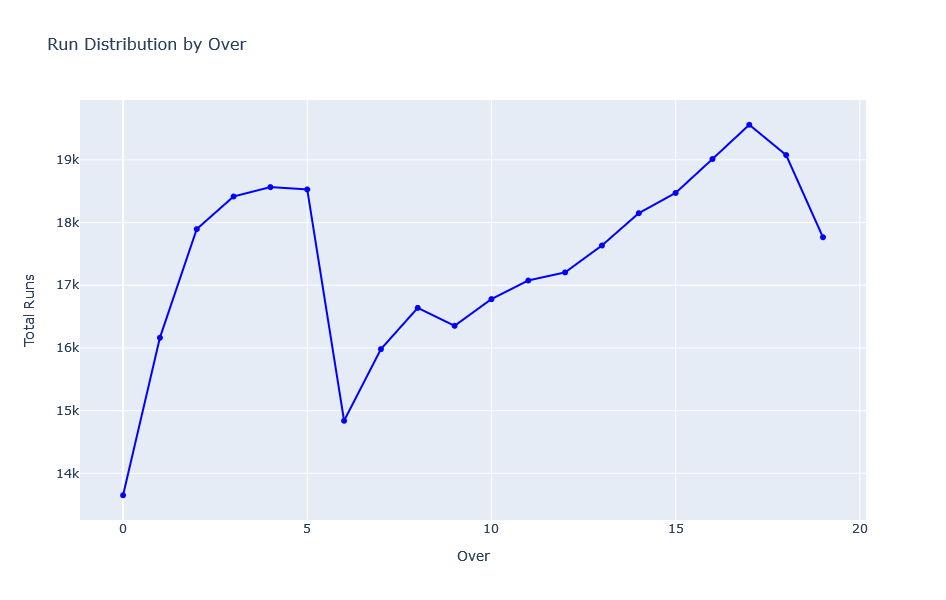

In [28]:
runs_per_over = dev.groupby('over')['total_runs'].sum().reset_index()
print(runs_per_over)

fig = px.line(runs_per_over, x='over', y='total_runs', markers=True, 
              title='Run Distribution by Over', 
              labels={'over': 'Over', 'total_runs': 'Total Runs'})

# Customize layout
fig.update_traces(line=dict(color='blue', width=2))
fig.update_layout(width=1000, height=600, title_font_size=16, xaxis_title_font_size=14, yaxis_title_font_size=14)
fig.show()


# Extras Breakdown

extras_type
wides      8380
legbyes    4001
noballs    1069
byes        673
penalty       2
Name: count, dtype: int64


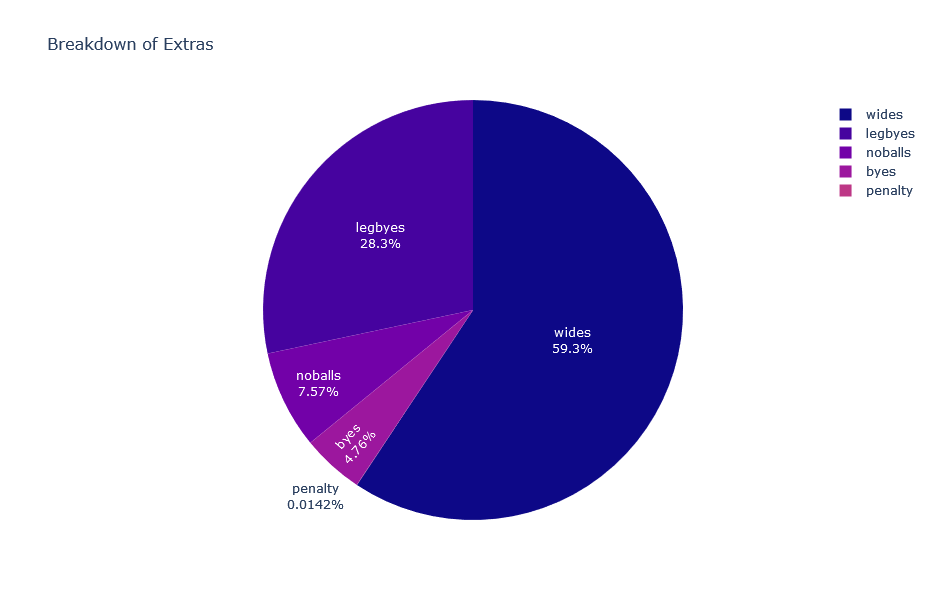

In [31]:
extras_breakdown = dev['extras_type'].value_counts()
print(extras_breakdown)

extras_df = extras_breakdown.reset_index()
extras_df.columns = ['extras_type', 'count']

fig = px.pie(extras_df, values='count', names='extras_type', 
             title='Breakdown of Extras',
             color_discrete_sequence=px.colors.sequential.Plasma)

fig.update_traces(textinfo='percent+label')
fig.update_layout(width=1000, height=600, title_font_size=16)
fig.show()

dismissal_kind
caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: count, dtype: int64


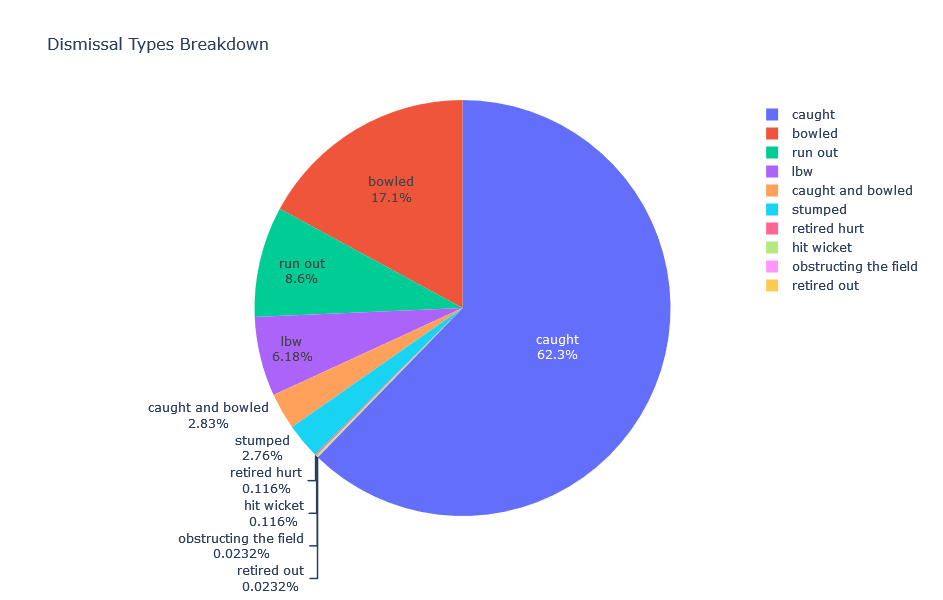

In [38]:
dismissal_types = dev['dismissal_kind'].dropna().value_counts()
print(dismissal_types)

dismissal_df = dismissal_types.reset_index()
dismissal_df.columns = ['dismissal_kind', 'count']

fig = px.pie(dismissal_df, values='count', names='dismissal_kind', 
             title='Dismissal Types Breakdown', 
             color_discrete_sequence=px.colors.qualitative.Plotly)

fig.update_traces(textinfo='percent+label')
fig.update_layout(width=1000, height=600, title_font_size=16)
fig.show()

# Team Performance Comparison

batting_team
Mumbai Indians                 42176
Kolkata Knight Riders          39331
Chennai Super Kings            38629
Royal Challengers Bangalore    37692
Rajasthan Royals               34747
Kings XI Punjab                30064
Sunrisers Hyderabad            29071
Delhi Daredevils               24296
Delhi Capitals                 14900
Deccan Chargers                11463
Punjab Kings                    9536
Gujarat Titans                  7757
Lucknow Super Giants            7510
Pune Warriors                   6358
Gujarat Lions                   4862
Royal Challengers Bengaluru     2930
Rising Pune Supergiant          2470
Rising Pune Supergiants         2063
Kochi Tuskers Kerala            1901
Name: total_runs, dtype: int64


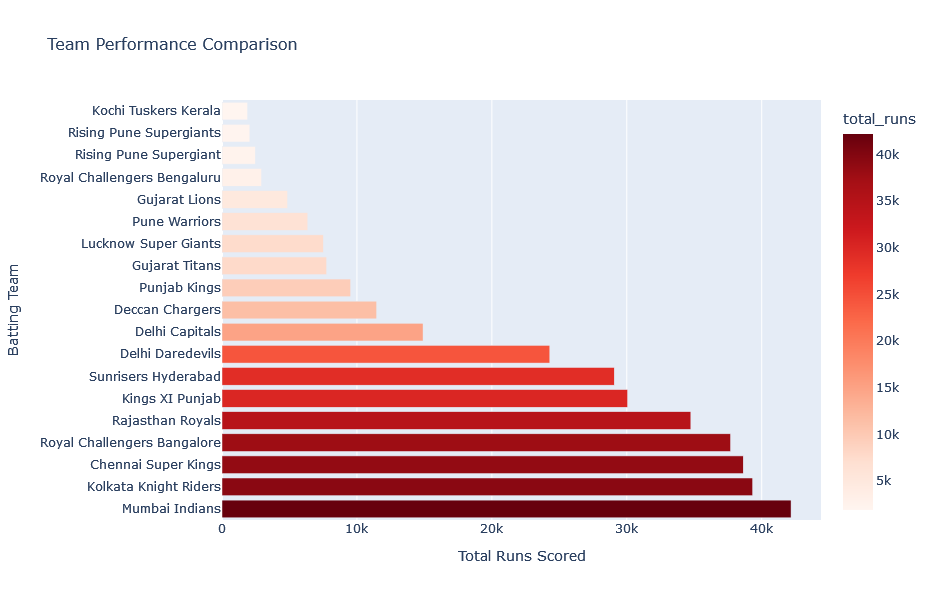

In [42]:
team_runs = dev.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)
print(team_runs)

team_runs_df = team_runs.reset_index()
team_runs_df.columns = ['batting_team', 'total_runs']

fig = px.bar(team_runs_df, y='batting_team', x='total_runs', 
             title='Team Performance Comparison', 
             orientation='h',  
             color='total_runs', 
             color_continuous_scale=px.colors.sequential.Reds)

fig.update_layout(title_font_size=16, xaxis_title='Total Runs Scored', yaxis_title='Batting Team', height=600)
fig.show()

# Impact of Toss on Match Outcomes

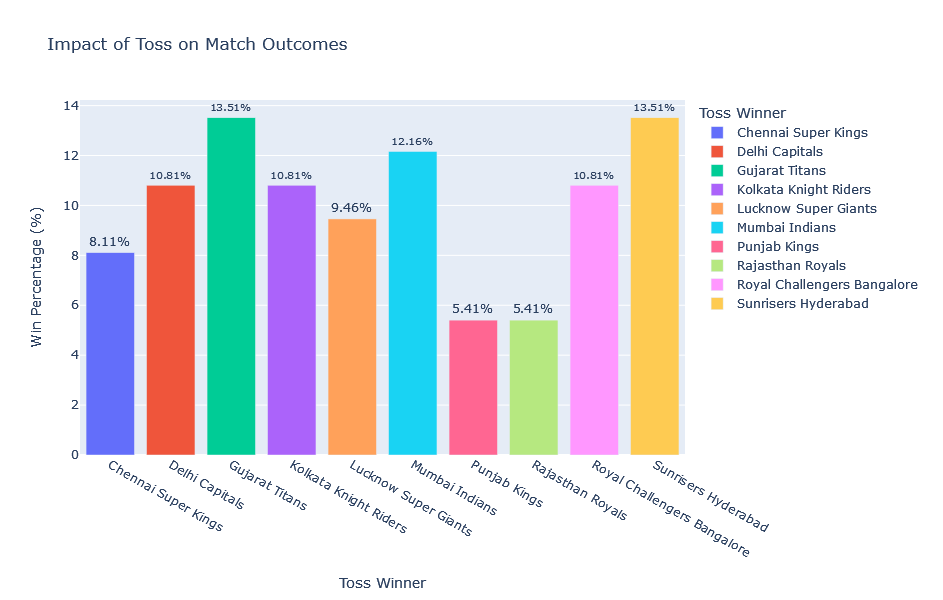

In [54]:
toss_results = matches.groupby(['TossWinner', 'WinningTeam']).size().unstack(fill_value=0)
toss_results['TossWins'] = toss_results.sum(axis=1)
toss_results['TossLosses'] = matches[matches['TossWinner'].isin(toss_results.index)].shape[0] - toss_results['TossWins']  
toss_results['WinPercentage'] = toss_results['TossWins'] / (toss_results['TossWins'] + toss_results['TossLosses']) * 100
toss_results = toss_results.reset_index()

fig = px.bar(toss_results, 
             x='TossWinner', 
             y='WinPercentage', 
             title='Impact of Toss on Match Outcomes',
             labels={'TossWinner': 'Toss Winner', 'WinPercentage': 'Win Percentage (%)'},
             color='TossWinner',
             text='WinPercentage')

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(width=1000, height=600, yaxis_title='Win Percentage (%)', xaxis_title='Toss Winner')
fig.show()